## MIDS W207 Final Project: Home Price Prediction

### Import packages

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

### Load data 

In [500]:
df = pd.read_csv('../MIDS_W207_Final_Project/data/train.csv')

In [501]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [502]:
df.shape

(1460, 81)

### Split data into train and dev set

In [503]:
train_y = np.log(df[:1000]['SalePrice'])
dev_y = np.log(df[1000:]['SalePrice'])
train_data = df[:1000].drop(['SalePrice', 'Id'], axis = 1)
dev_data = df[1000:].drop(['SalePrice', 'Id'], axis = 1)

In [504]:
train_y.shape

(1000,)

In [505]:
dev_y.shape

(460,)

In [506]:
train_data.shape

(1000, 79)

In [507]:
dev_data.shape

(460, 79)

### EDA and data cleaning

(array([ 5.,  0.,  3.,  4.,  4.,  6., 18., 20., 17., 22., 45., 39., 51.,
        64., 59., 61., 45., 41., 38., 50., 45., 35., 26., 26., 23., 23.,
        23., 19., 19., 15., 13., 13., 14., 11.,  8.,  4.,  4.,  6.,  9.,
        11.,  7.,  3.,  5.,  5.,  1.,  3.,  4.,  4.,  4.,  2.,  3.,  2.,
         2.,  1.,  2.,  1.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

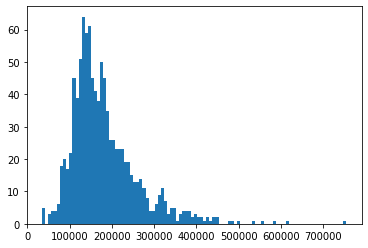

In [592]:
plt.hist(df[:1000]['SalePrice'], bins = 100)

(array([ 2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  1.,  0.,  2.,  2.,  0.,  1.,  3.,  0.,  0.,  2.,  3.,
         7.,  6.,  6.,  8.,  9.,  5.,  4., 10., 10.,  7., 19., 26., 16.,
        19., 18., 23., 42., 29., 38., 45., 35., 28., 32., 31., 29., 26.,
        40., 32., 32., 27., 22., 22., 21., 19., 22., 18., 26.,  9., 18.,
        15., 14., 14.,  9.,  3.,  8., 14., 12.,  4.,  9.,  3.,  3.,  6.,
         8.,  3.,  2.,  3.,  4.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([10.46024211, 10.49098442, 10.52172673, 10.55246904, 10.58321134,
        10.61395365, 10.64469596, 10.67543827, 10.70618058, 10.73692289,
        10.7676652 , 10.79840751, 10.82914982, 10.85989213, 10.89063444,
        10.92137675, 10.95211906, 10.98286136, 11.01360367, 11.04434598,
        11.07508829, 11.1058306 , 11.13657291, 11.16731522, 11.19805753,
        11.22879984, 11.25954215, 11.29028446, 11.32102677, 11.351769

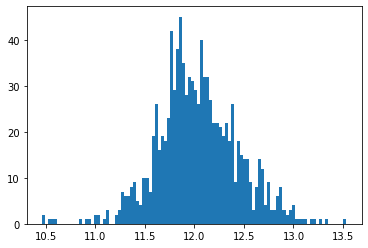

In [593]:
plt.hist(np.log(df[:1000]['SalePrice']), bins = 100)

In [508]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
MSSubClass       1000 non-null int64
MSZoning         1000 non-null object
LotFrontage      827 non-null float64
LotArea          1000 non-null int64
Street           1000 non-null object
Alley            65 non-null object
LotShape         1000 non-null object
LandContour      1000 non-null object
Utilities        1000 non-null object
LotConfig        1000 non-null object
LandSlope        1000 non-null object
Neighborhood     1000 non-null object
Condition1       1000 non-null object
Condition2       1000 non-null object
BldgType         1000 non-null object
HouseStyle       1000 non-null object
OverallQual      1000 non-null int64
OverallCond      1000 non-null int64
YearBuilt        1000 non-null int64
YearRemodAdd     1000 non-null int64
RoofStyle        1000 non-null object
RoofMatl         1000 non-null object
Exterior1st      1000 non-null object
Exterior2nd      1000 non-nu

#### Identify missing data

In [509]:
# Identify the missing data and calculate the percentage by column.
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,998,0.998
MiscFeature,957,0.957
Alley,935,0.935
Fence,806,0.806
FireplaceQu,478,0.478
LotFrontage,173,0.173
GarageType,56,0.056
GarageFinish,56,0.056
GarageQual,56,0.056
GarageCond,56,0.056


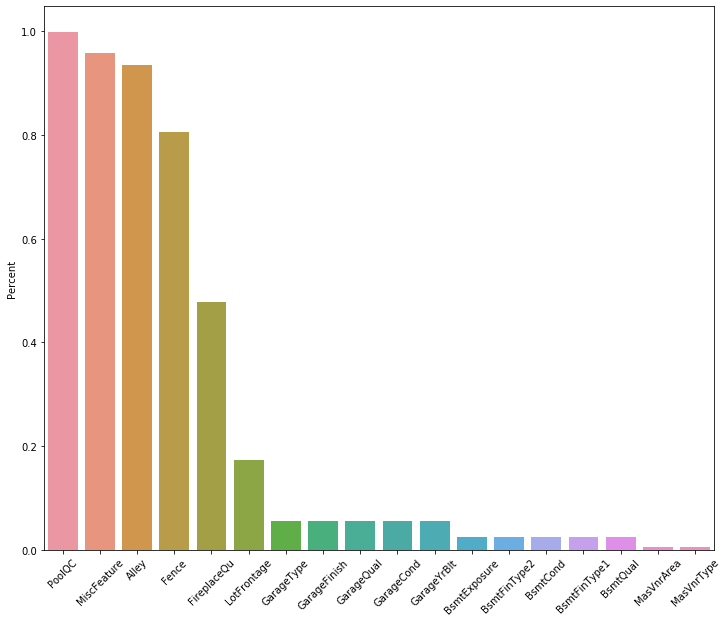

In [510]:
plt.figure(figsize=(12,10))
sns.barplot(x=missing_data[:18].index, y=missing_data[:18]['Percent'])
plt.xticks(rotation=45)
plt.show()

#### Noticing that there are a few columns with non-trivial fraction (> 40%, arbitrary) of  missing data, we decide not to include them for further analysis.

In [511]:
cols_to_delete = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_data= train_data.drop(columns = cols_to_delete)
dev_data = dev_data.drop(columns = cols_to_delete)

In [512]:
train_data.shape

(1000, 74)

In [513]:
dev_data.shape

(460, 74)

#### For the other columns with trivial fraction of missing data, we decide to fix them in the follwing way.

In [514]:
# all missing values for the categorical columns will be replaced by "None"
# all missing values for the numeric columns will be replaced by median of that field

for col in train_data.columns:
    if train_data[col].dtypes == 'O':
        train_data[col] = train_data[col].replace(np.nan,"None")
    else:
        train_data[col] = train_data[col].replace(np.nan,train_data[col].median())

for col in dev_data.columns:
    if dev_data[col].dtypes == 'O':
        dev_data[col] = dev_data[col].replace(np.nan,"None")
    else:
        dev_data[col] = dev_data[col].replace(np.nan,dev_data[col].median())

#### Obviously we have both numeric and categorical features, we can split them for convenience.

In [515]:
num_cols = []
cat_cols = []
for col in train_data.columns:
    if train_data[col].dtypes == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [516]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [517]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

#### In fact, the feature 'MSSubClass' uses integer as identifier for dweling type, so we should remove it to the categorical set.

In [518]:
num_cols.remove('MSSubClass')
cat_cols.append('MSSubClass')

### Linear regression using all the numeric features

In [521]:
lr = LinearRegression()
lr.fit(train_data[num_cols], train_y)
lr.score(train_data[num_cols], train_y)

0.8867284579667324

In [522]:
pred = lr.predict(dev_data[num_cols])
np.sqrt(metrics.mean_squared_error(dev_y, pred))

0.1808678425709986

### Correlation matrix

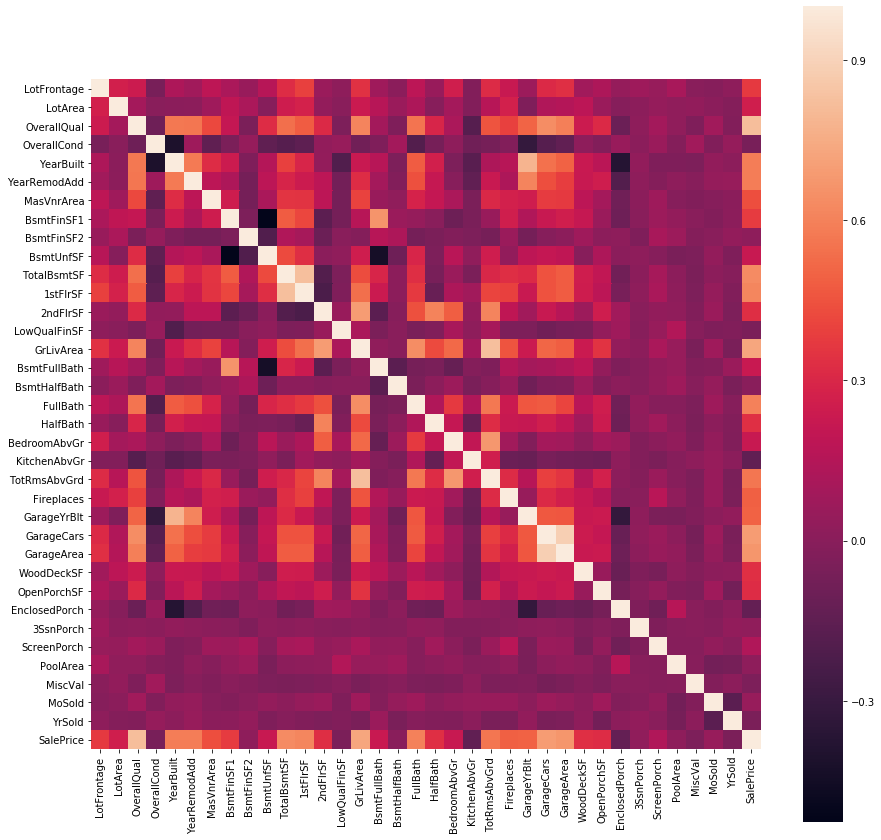

In [523]:
# Comprehensive correlation analysis 
corrmat = pd.concat([train_data[num_cols], train_y], axis = 1).corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True)

### Bivariate analysis between numeric features and sale price.

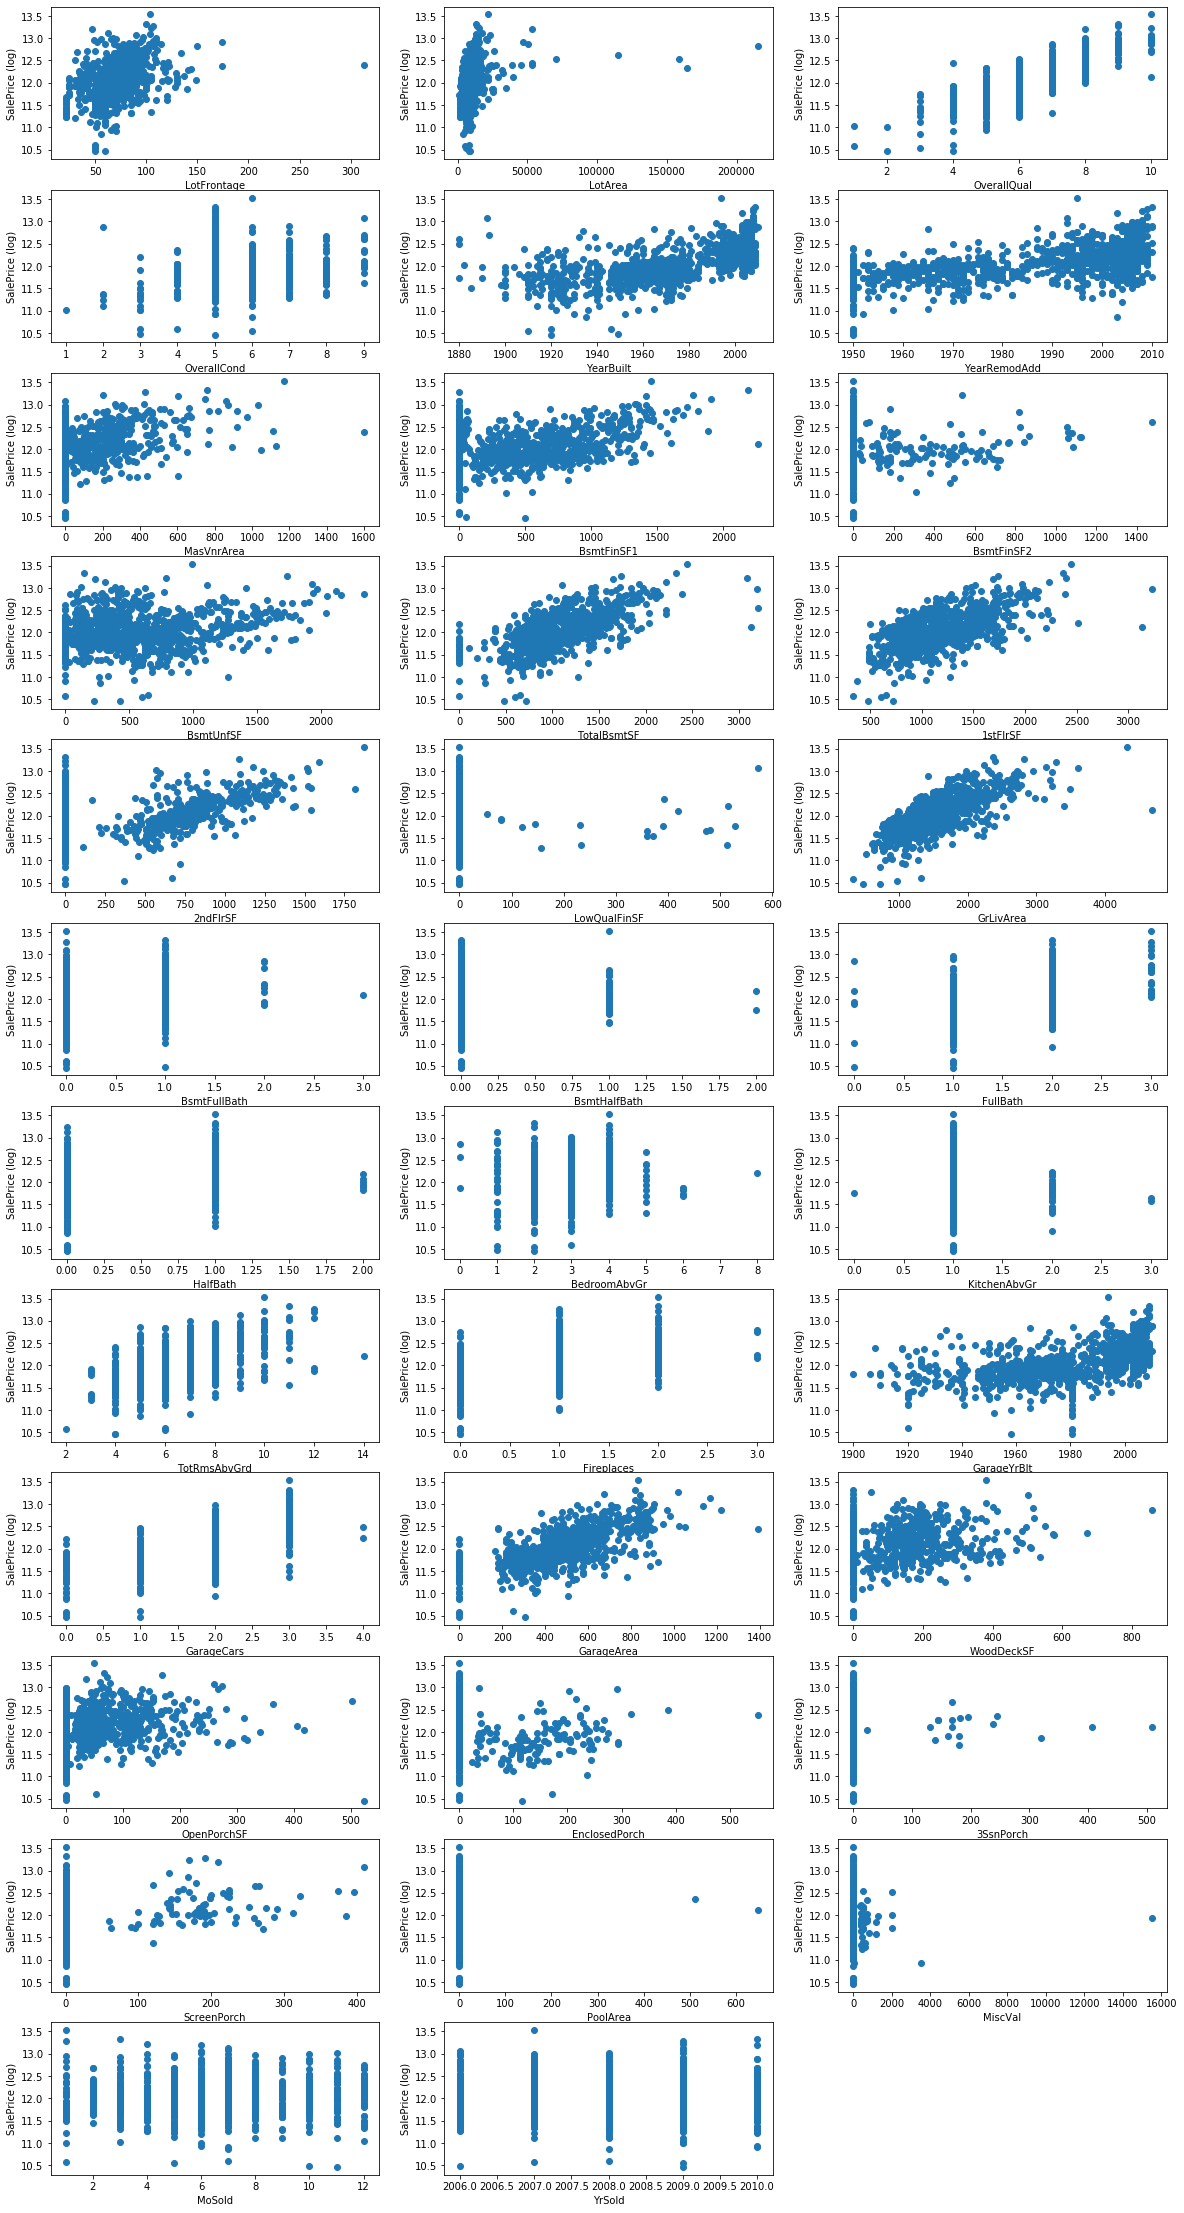

In [524]:
plt.figure(figsize=(20,50))
for idx,col in enumerate(num_cols):
    plt.subplot(15,3,idx+1)
    plt.scatter(x = train_data[col],y= train_y)
    plt.ylabel("SalePrice (log)")
    plt.xlabel(col)

#### From the correlation matrix and the bivariate analysis above, we can tell that (1) some features are more strongly linearly correlated with sale price than the others; (2) the correlation between features can be fairly strong and (3) for the features not showing strong correlation with sale price, feature engineering may help reveal correlation based on the common sense.

### Feature selection and linear regression

In [525]:
# Use an arbitrary criteria of pearson's correlation larger than 0.5 to select features.
select_num_cols = []
print('Pearson correlation between features and sale price:')
for col in num_cols:
    corr, _ = pearsonr(train_data[col], train_y)
    print(col, ':', corr)
    if abs(corr) > 0.5: select_num_cols.append(col)
print(select_num_cols)

Pearson correlation between features and sale price:
LotFrontage : 0.36962519381627484
LotArea : 0.25677228701502014
OverallQual : 0.8203565230042018
OverallCond : -0.056724708193775376
YearBuilt : 0.5884253049857875
YearRemodAdd : 0.5827953139730948
MasVnrArea : 0.43904654935680243
BsmtFinSF1 : 0.37611897457791255
BsmtFinSF2 : 0.01672223655456286
BsmtUnfSF : 0.22323353904489782
TotalBsmtSF : 0.6362645209834035
1stFlrSF : 0.616162695616642
2ndFlrSF : 0.33115439097768534
LowQualFinSF : -0.0477684403446768
GrLivArea : 0.7295761063256154
BsmtFullBath : 0.22753040128414725
BsmtHalfBath : 8.842430771125474e-06
FullBath : 0.5993270567525847
HalfBath : 0.33340322687503166
BedroomAbvGr : 0.22079850461019326
KitchenAbvGr : -0.14110650879486153
TotRmsAbvGrd : 0.562969921237733
Fireplaces : 0.48903710036541365
GarageYrBlt : 0.4960419345332211
GarageCars : 0.6921149387861143
GarageArea : 0.6693708607198884
WoodDeckSF : 0.3343860207877159
OpenPorchSF : 0.32087105463838805
EnclosedPorch : -0.1315926

In [526]:
lr = LinearRegression()
lr.fit(train_data[select_num_cols], train_y)
lr.score(train_data[select_num_cols], train_y)

0.8438590138077033

In [527]:
pred = lr.predict(dev_data[select_num_cols])
np.sqrt(metrics.mean_squared_error(dev_y, pred))

0.1945520302145349

### Feature engineering and linear regression

#### Although the feature of year sold doesn't show strong correlation with sale price, the house age plays an important role in buyer's purchase decision. Usually the newer a house is, the higher it can sell for. Accordingly, we can engineer two features to reveal the relevant information: (1) house age = year built - year sold and (2) remodel age = year remodel add - year sold.

In [528]:
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
dev_data['HouseAge'] = dev_data['YrSold'] - dev_data['YearBuilt']
train_data['RemodAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
dev_data['RemodAge'] = dev_data['YrSold'] - dev_data['YearRemodAdd']

In [529]:
corr,_ = pearsonr(train_data['HouseAge'], train_y)
print('Pearson correlation between HouseAge and SalePrice:', corr)
corr,_ = pearsonr(train_data['RemodAge'], train_y)
print('Pearson correlation between RemodAge and SalePrice:', corr)

Pearson correlation between HouseAge and SalePrice: -0.5900685913201702
Pearson correlation between RemodAge and SalePrice: -0.5863113452542095


In [594]:
# Compose new data set with both the selected and the engineered numeric features.
train_data_num = pd.concat([train_data[select_num_cols],train_data['HouseAge'],train_data['RemodAge']], axis = 1)
dev_data_num = pd.concat([dev_data[select_num_cols],dev_data['HouseAge'],dev_data['RemodAge'],], axis = 1)

In [595]:
lr = LinearRegression()
lr.fit(train_data_num, train_y)
lr.score(train_data_num, train_y)

0.8442106505481792

In [533]:
pred = lr.predict(dev_data_num)
np.sqrt(metrics.mean_squared_error(dev_y, pred))

0.19574467376352667

### Convert categorical variables to numeric variables
#### Get dummy variables from the categorical variables and concate with the numeric variables

In [534]:
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

In [535]:
df_dummies.shape

(1460, 197)

In [536]:
df_num = df[num_cols]
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


In [537]:
df_num_dummies = pd.concat([df_dummies, df_num], axis = 1)
df_num_dummies.shape

(1460, 232)

In [538]:
df_num_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 232 entries, MSSubClass to YrSold
dtypes: float64(3), int64(33), uint8(196)
memory usage: 690.2 KB


In [539]:
# Fix the missing data.
for col in df_num_dummies.columns:
    df_num_dummies[col] = df_num_dummies[col].replace(np.nan,df_num_dummies[col].median())

In [540]:
train_num_dummies = df_num_dummies[:1000]
dev_num_dummies = df_num_dummies[1000:]

In [541]:
lr = LinearRegression()
lr.fit(train_num_dummies, train_y)
lr.score(train_num_dummies, train_y)

0.9451358894861116

In [542]:
pred = lr.predict(dev_num_dummies)
np.sqrt(metrics.mean_squared_error(dev_y, pred))

0.16756415851207418

### PCA

In [570]:
# Select the first k principle components explaining high fraction of total variance
training_score = []
rmse = []
for k in range(1,200,1):
    pca = PCA(n_components = k)
    train_num_dummies_kd = pca.fit_transform(train_num_dummies)
    
    lr = LinearRegression()
    lr.fit(train_num_dummies_kd, train_y)
    training_score.append(lr.score(train_num_dummies_kd, train_y))
    
    pred = lr.predict(pca.transform(dev_num_dummies))
    rmse.append(np.sqrt(metrics.mean_squared_error(dev_y, pred)))

Text(0, 0.5, 'Linear regression training score')

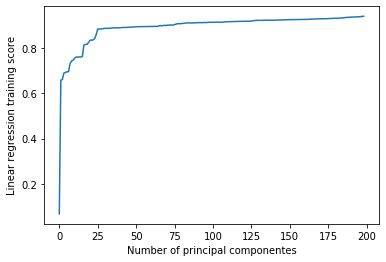

In [571]:
plt.figure()
plt.plot(training_score)
plt.xlabel('Number of principal componentes')
plt.ylabel('Linear regression training score')

Text(0, 0.5, 'RMSE')

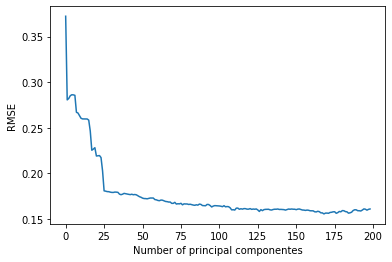

In [572]:
plt.figure()
plt.plot(rmse)
plt.xlabel('Number of principal componentes')
plt.ylabel('RMSE')

In [578]:
pca = PCA(n_components = 168)
train_num_dummies_kd = pca.fit_transform(train_num_dummies)

In [579]:
lr = LinearRegression()
lr.fit(train_num_dummies_kd, train_y)
lr.score(train_num_dummies_kd, train_y)

0.9301993296946731

In [580]:
pred = lr.predict(pca.transform(dev_num_dummies))
np.sqrt(metrics.mean_squared_error(dev_y, pred))

0.1567418752990639

In [581]:
rmse.index(min(rmse))

168

In [582]:
min(rmse)

0.15550271275285787